In [36]:
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

dataset = pd.read_csv('income.csv')
print(dataset)

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

<Axes: title={'center': 'Objects in workclass'}, xlabel='objects', ylabel='count'>

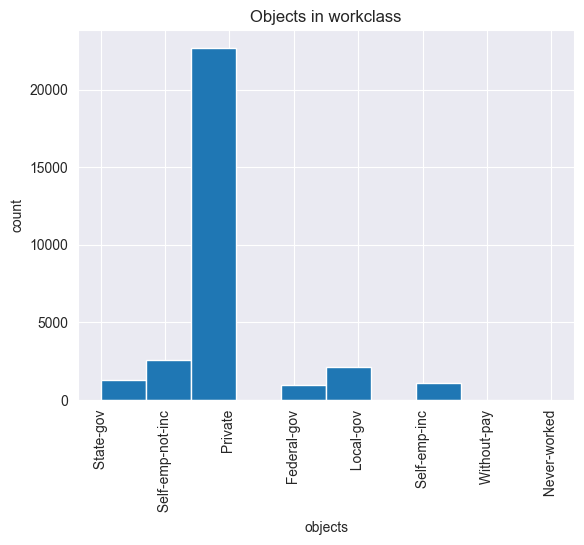

In [37]:
dataset.replace(' ?', np.NaN, inplace=True)
plt.xticks(rotation=90)
plt.title('Objects in workclass')
plt.ylabel('count')
plt.xlabel('objects')
dataset['workclass'].hist()

In [38]:
from sklearn import feature_extraction

dataset['workclass'] = dataset['workclass'].fillna(dataset['workclass'].mode()[0])
dataset['occupation'] = dataset['occupation'].fillna(dataset['occupation'].mode()[0])
dataset['native_country'] = dataset['native_country'].fillna(dataset['native_country'].mode()[0])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [39]:
from tensorflow.python.keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('income', axis=1), dataset['income'], test_size=0.3, random_state=10)

X_train = (pd.DataFrame(X_train)).to_numpy(dtype=('float32'))
X_test = (pd.DataFrame(X_test)).to_numpy(dtype=('float32'))

print(X_train.shape)
print(X_test.shape)

y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

print(y_train.shape)
print(y_test.shape)


(22792, 14)
(9769, 14)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.python.keras.utils import np_utils

NB_CLASSES = y_train.shape